In [1]:
import sympy as sp
from sympt import display_dict, hbar, BosonOp, Dagger, Operator

# Preparation of the Hamiltonian Confimenent Class

In [2]:
omega_x = sp.Symbol('omega_x', positive=True, real=True)

k_y = sp.Symbol('k_y', positive=True, real=True)
omega_y = omega_x * k_y

k_c = sp.Symbol('k_c', real=True)
omega_c = omega_x * k_c

omega_3 = sp.sqrt(sp.sqrt((omega_x**2 - omega_y**2)**2 + 2*omega_c**2 * (omega_x**2 + omega_y**2) + omega_c**4))

epsilon = sp.Symbol('epsilon', positive=True, real=True) # eccentricity

subs_rules = {
    k_y**2 : 1 - epsilon**2,
}

omega_p = (sp.sqrt(sp.Rational(1, 2) * (omega_x**2 + omega_y**2 + omega_c**2 + omega_3**2))).subs(subs_rules).expand().collect(omega_x)
omega_m = (sp.sqrt(sp.Rational(1, 2) * (omega_x**2 + omega_y**2 + omega_c**2 - omega_3**2))).subs(subs_rules).expand().collect(omega_x)

display(sp.Eq(sp.Symbol('omega_+'), omega_p))
display(sp.Eq(sp.Symbol('omega_-'), omega_m))

Eq(omega_+, omega_x*sqrt(-epsilon**2/2 + k_c**2/2 + sqrt(epsilon**4 - 2*epsilon**2*k_c**2 + k_c**4 + 4*k_c**2)/2 + 1))

Eq(omega_-, omega_x*sqrt(-epsilon**2/2 + k_c**2/2 - sqrt(epsilon**4 - 2*epsilon**2*k_c**2 + k_c**4 + 4*k_c**2)/2 + 1))

In [3]:
kp, km = sp.symbols('k_+ k_-', positive=True, real=True)
omega_p_s, omega_m_s = omega_x * kp, omega_x * km

Omega_x = sp.sqrt(omega_x**2 + sp.Rational(1,4) * omega_c**2).collect(omega_x)
Omega_y = sp.sqrt(omega_y**2 + sp.Rational(1,4) * omega_c**2).collect(omega_x).subs(subs_rules)
k3 = sp.Symbol('k_3', positive=True, real=True)
Omega_3 = omega_x * k3

display(sp.Eq(sp.Symbol('Omega_x'), Omega_x))
display(sp.Eq(sp.Symbol('Omega_y'), Omega_y))
display(sp.Eq(sp.Symbol('Omega_3'), Omega_3))

Eq(Omega_x, omega_x*sqrt(k_c**2/4 + 1))

Eq(Omega_y, omega_x*sqrt(-epsilon**2 + k_c**2/4 + 1))

Eq(Omega_3, k_3*omega_x)

In [4]:
subs_rules.update({
    2*(1 + sp.Rational(1,2) *(k_c**2 - epsilon**2 + k3**2)) + 2 - 2*epsilon**2: 2*kp**2 + 2*kp**2*km**2,
    2*(1 + sp.Rational(1,2) *(k_c**2 - epsilon**2 - k3**2)) + 2: 2*km**2 + 2,
    -2*(1 + sp.Rational(1,2) *(k_c**2 - epsilon**2 + k3**2)) - 2: -2*kp**2 - 2,
    -2*(1 + sp.Rational(1,2) *(k_c**2 - epsilon**2 - k3**2)) - 2 + 2*epsilon**2: -2*km**2 - 2*kp**2*km**2,
    2*(sp.Rational(1,2) * ((omega_p**2 + omega_m**2)/omega_x**2).cancel() + 1 - sp.Rational(1,2) * epsilon**2) :(kp**2 + km**2) + 1 + kp**2*km**2,
})

display_dict(subs_rules)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
c1 = sp.sqrt((Omega_x**2 + 3*Omega_y**2 + Omega_3**2) / (2 * Omega_x**2 + 2 * Omega_y**2)).collect(omega_x).subs(subs_rules).factor()
c2 = sp.sqrt((3*Omega_x**2 + Omega_y**2 - Omega_3**2) / (2 * Omega_x**2 + 2 * Omega_y**2)).collect(omega_x).subs(subs_rules).factor()
Omega_1 = sp.sqrt(sp.Rational(1,4) * (3*Omega_x**2 + Omega_y**2 + Omega_3**2)).collect(omega_x).factor().subs(subs_rules).factor()
Omega_2 = sp.sqrt(sp.Rational(1,4) * (Omega_x**2 + 3*Omega_y**2 - Omega_3**2)).collect(omega_x).factor().subs(subs_rules).factor()

display(sp.Eq(sp.Symbol('c1'), c1))
display(sp.Eq(sp.Symbol('c2'), c2))
display(sp.Eq(sp.Symbol('Omega_1'), Omega_1))
display(sp.Eq(sp.Symbol('Omega_2'), Omega_2))

Eq(c1, sqrt(2)*k_+/sqrt(k_+**2 + 1))

Eq(c2, sqrt(2)/sqrt(k_+**2 + 1))

Eq(Omega_1, sqrt(2)*omega_x*sqrt(k_+**2 + 1)/2)

Eq(Omega_2, sqrt(2)*k_-*omega_x*sqrt(k_+**2 + 1)/2)

In [6]:
hbar = sp.Symbol('hbar', positive=True, real=True)
m = sp.Symbol('m', positive=True, real=True)
theta = sp.Symbol('theta', real=True)

lx = sp.Symbol('l_x', positive=True, real=True)

subs_lenghts = {
    sp.sqrt(hbar / (m*omega_x)) : lx,
    omega_x : hbar / (m*lx**2),
}

In [7]:
beta = (- m * sp.sqrt((Omega_x**2 + Omega_y**2) / 2)).factor().subs(subs_rules).factor()
alpha = 1/beta

display_dict(
    {sp.Symbol('alpha'): alpha, sp.Symbol('beta'): beta}
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
#x
display_dict({
    sp.sqrt(sp.UnevaluatedExpr(hbar*sp.Symbol('c_1')/(2*m*sp.Symbol('Omega_1')))) : sp.sqrt(hbar / (2*m) * c1/ Omega_1).subs(subs_lenghts).simplify(),
    sp.sqrt(sp.UnevaluatedExpr(hbar*m*sp.Symbol('Omega_2')/(2*sp.Symbol('c_2')))) * sp.Symbol('alpha') :(alpha* sp.sqrt(hbar * m / 2 * Omega_2/c2)).subs(subs_lenghts).simplify(),
    })
#y
display_dict({
    sp.sqrt(sp.UnevaluatedExpr(hbar*sp.Symbol('c_2')/(2*m*sp.Symbol('Omega_2')))) : sp.sqrt(hbar / (2*m) * c2/ Omega_2).subs(subs_lenghts).simplify(),
    sp.sqrt(sp.UnevaluatedExpr(hbar*m*sp.Symbol('Omega_1')/(2*sp.Symbol('c_1')))) * sp.Symbol('alpha') :(alpha* sp.sqrt(hbar * m / 2 * Omega_1/c1)).subs(subs_lenghts).simplify(),
    })

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# p_x
display_dict({
    sp.sqrt(sp.UnevaluatedExpr(hbar*sp.Symbol('c_2')/(2*m*sp.Symbol('Omega_2')))) * sp.Symbol('beta') : (beta * sp.sqrt(hbar / (2*m) * c2/ Omega_2)).subs(subs_lenghts).simplify(),
    sp.sqrt(sp.UnevaluatedExpr(hbar*m * sp.Symbol('Omega_1')/(2*sp.Symbol('c_1')))) : (sp.sqrt(hbar * m / 2 * Omega_1/c1)).subs(subs_lenghts).simplify(),
})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# p_y
display_dict({
    sp.sqrt(sp.UnevaluatedExpr(hbar*sp.Symbol('c_1')/(2*m*sp.Symbol('Omega_1')))) * sp.Symbol('beta') : (beta * sp.sqrt(hbar / (2*m) * c1/ Omega_1)).subs(subs_lenghts).simplify(),
    sp.sqrt(sp.UnevaluatedExpr(hbar*m * sp.Symbol('Omega_2')/(2*sp.Symbol('c_2')))) : (sp.sqrt(hbar * m / 2 * Omega_2/c2)).subs(subs_lenghts).simplify(),
})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
#  tan(2*theta) = A/B
A = (omega_c * sp.sqrt(2*(Omega_x**2 + Omega_y**2))).factor().subs(subs_rules).factor()
B = (omega_x**2 - omega_y**2).subs(subs_rules).factor()

display_dict({
    sp.Symbol('A') : A,
    sp.Symbol('B') : B,
    sp.Symbol('A')/sp.Symbol('B') : (A/B).simplify(),
})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
theta = sp.atan2(sp.Symbol('A'),sp.Symbol('B'))/2
theta

atan2(A, B)/2

In [13]:
substituition_A2_B2 = {
    sp.Symbol('A')**2 + sp.Symbol('B')**2 : (A**2 + B**2).expand().subs(kp**2*km**2, 1 - epsilon**2).subs(kp**2, omega_p**2/omega_x**2).subs(km**2, omega_m**2/omega_x**2).factor()
}
substituition = {
    sp.Symbol('A') : A,
    sp.Symbol('B') : B,
}

display_dict({
    sp.sin(sp.Symbol('theta'))**2 : (sp.sin(theta)**2).trigsimp().subs(substituition_A2_B2).simplify().subs(((omega_p**2 - omega_m**2)/omega_x**2).simplify(), kp**2 - km**2).subs(substituition),
    sp.cos(sp.Symbol('theta'))**2 : (sp.cos(theta)**2).trigsimp().subs(substituition_A2_B2).simplify().subs(((omega_p**2 - omega_m**2)/omega_x**2).simplify(), kp**2 - km**2).subs(substituition),
    sp.sin(sp.Symbol('theta'))*sp.cos(sp.Symbol('theta')) : (sp.sin(theta)*sp.cos(theta)).trigsimp().subs(substituition_A2_B2).simplify().subs(((omega_p**2 - omega_m**2)/omega_x**2).simplify(), kp**2 - km**2).subs(substituition),
})

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
display_dict({
    (kp**2 + 1)*(km**2 + 1) : (((kp**2 + 1)*(km**2 + 1)).subs(kp**2, omega_p**2/omega_x**2).subs(km**2, omega_m**2/omega_x**2)).expand()
})

<IPython.core.display.Math object>

# Results

In [15]:
from Elliptical_Well import EllipticalConfinement
import numpy as np
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize

# Transparent background for figures but keep the legend background white but its text color black
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'none'
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.shadow'] = False
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'none'
# White spins, axis and ticks 
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'

In [16]:
H_conf = EllipticalConfinement()
H_conf.H

hbar*omega_x*(k_+*(1/2 + Dagger(a_+)*a_+) + k_-*(1/2 + Dagger(a_-)*a_-))

In [17]:
display_dict({
    H_conf.kp : H_conf.kp.subs(H_conf.omega_pm_to_xyc_subs),
    H_conf.km : H_conf.km.subs(H_conf.omega_pm_to_xyc_subs),
})

Kp = sp.lambdify((H_conf.kc, H_conf.eccentricity), H_conf.kp.subs(H_conf.omega_pm_to_xyc_subs), 'numpy')
Km = sp.lambdify((H_conf.kc, H_conf.eccentricity), H_conf.km.subs(H_conf.omega_pm_to_xyc_subs), 'numpy')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Text(0.2, 0.9, '$k_- = \\frac1\\varphi$')

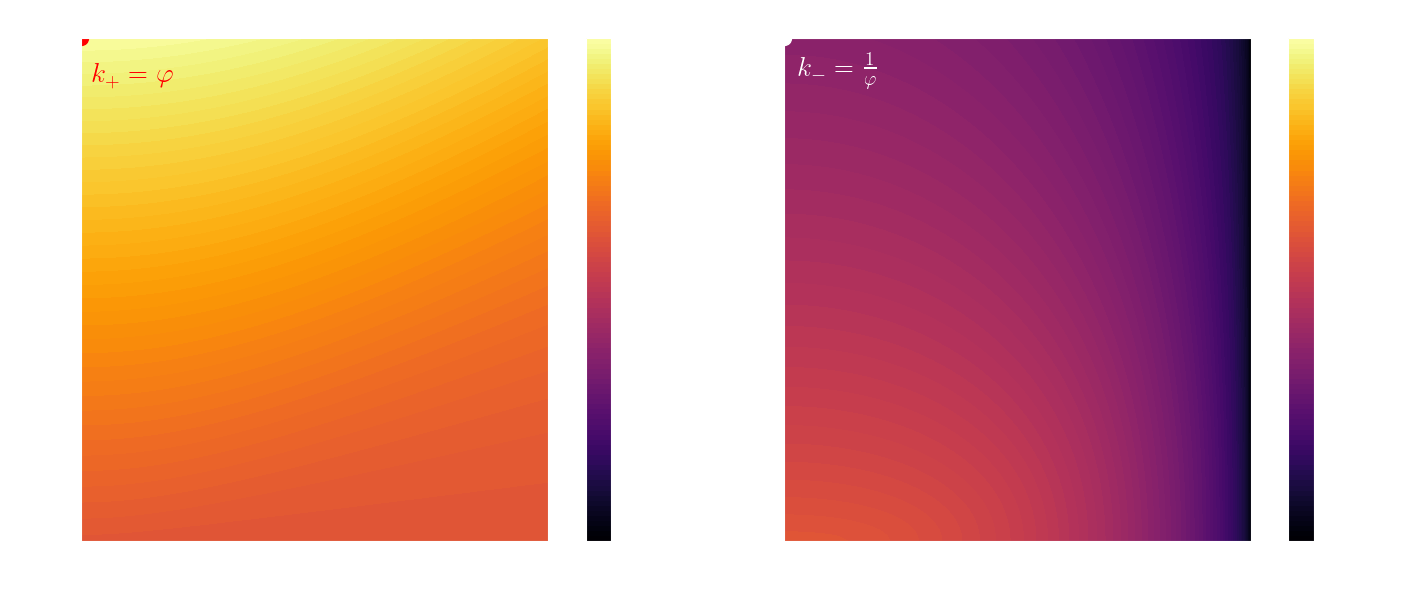

In [18]:
eccentricity = np.linspace(0, 1, 100)
kc = np.linspace(0, 1, 100)

Epsilon, Kcs = np.meshgrid(eccentricity, kc)


fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

golden_ration = (1 + np.sqrt(5)) / 2
N_levels = 100
levels = np.linspace(0, golden_ration + golden_ration/N_levels, N_levels)

ax = axs[0]
c = ax.contourf(Epsilon, Kcs, Kp(Kcs, Epsilon), levels=levels, cmap='inferno')
ax.set_xlabel(r'$\epsilon$', fontsize=20, color='white')
ax.set_ylabel(r'$k_c=\omega_c/\omega_x$', fontsize=20, color='white')
ax.set_title(r'$k_+ = \omega_+/\omega_x$', fontsize=20, color='white')
fig.colorbar(c, ax=ax, label=r'$k_+$')

ax.scatter([0], [1], color='red', s=100)
ax.text(0.2, 0.9, r'$k_+ = \varphi$', color='red', fontsize=20, va='bottom', ha='right')

ax = axs[1]
c = ax.contourf(Epsilon, Kcs, Km(Kcs, Epsilon), levels=levels, cmap='inferno')
ax.set_xlabel(r'$\epsilon$', fontsize=20, color='white')
ax.set_ylabel(r'$k_c=\omega_c/\omega_x$', fontsize=20, color='white')
ax.set_title(r'$k_- = \omega_-/\omega_x$', fontsize=20, color='white')
fig.colorbar(c, ax=ax, label=r'$k_-$')

ax.scatter([0], [1], color='white', s=100)
ax.text(0.2, 0.9, r'$k_- = \frac1\varphi$', color='white', fontsize=20, va='bottom', ha='right')



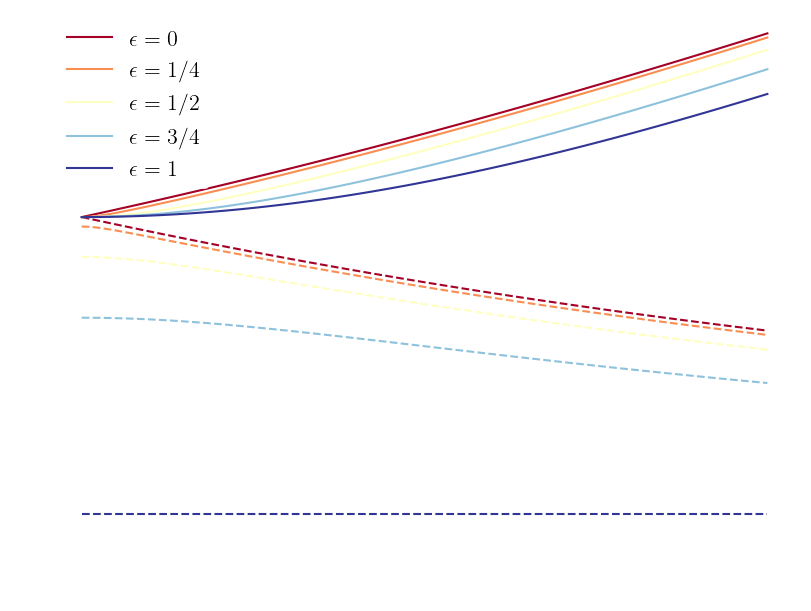

In [19]:
Epsilon = np.linspace(0, 1, 5)
Kcs = np.linspace(0, 1, 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
cmap = plt.get_cmap('RdYlBu')

for epsilon in Epsilon:
    ax.plot(Kcs, Kp(Kcs, epsilon), label=fr'$\epsilon={sp.nsimplify(epsilon)}$', color=cmap(epsilon))
    ax.plot(Kcs, Km(Kcs, epsilon), ls='--', color=cmap(epsilon))
ax.set_xlabel(r'$k_c=\omega_c/\omega_x$', fontsize=20, color='white')

ax.legend()

In [20]:
H_conf.x.subs(H_conf.position_momentum_to_new_basis)

sqrt(k_+)*l_x*cos(theta)*(Dagger(a_+) + a_+)/sqrt(k_+**2 + 1) - I*sqrt(k_-)*l_x*sin(theta)*(-Dagger(a_-) + a_-)/sqrt(k_-**2 + 1)

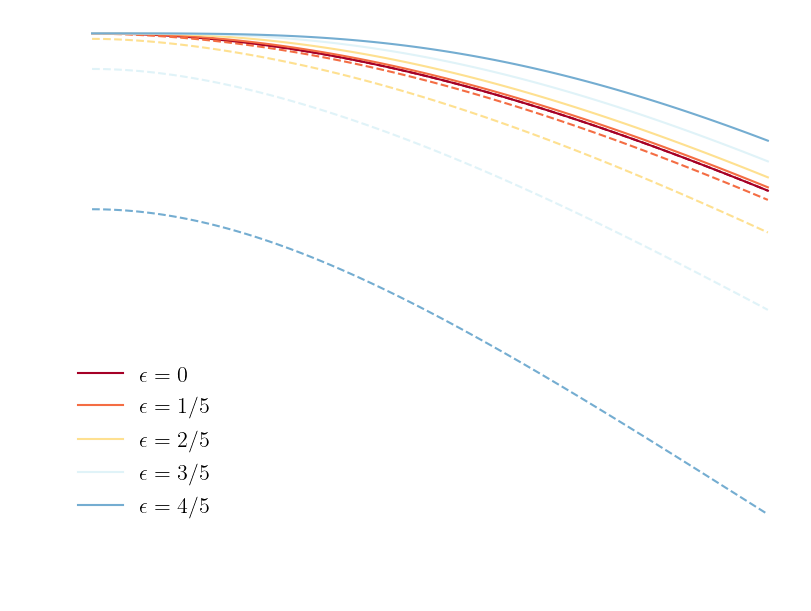

In [21]:
Epsilon = np.linspace(0, 0.8, 5)
Kcs = np.linspace(0, 1, 100)


fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
cmap = plt.get_cmap('RdYlBu')

for epsilon in Epsilon:
    KP = Kp(Kcs, epsilon)
    KM = Km(Kcs, epsilon)
    ax.plot(Kcs, np.sqrt( KP / (KP**2 + 1)), label=fr'$\epsilon={sp.nsimplify(epsilon)}$', color=cmap(epsilon))
    ax.plot(Kcs, np.sqrt( KM / (KM**2 + 1)), ls='--', color=cmap(epsilon))
ax.set_xlabel(r'$k_c=\omega_c/\omega_x$', fontsize=20, color='white')

ax.legend()

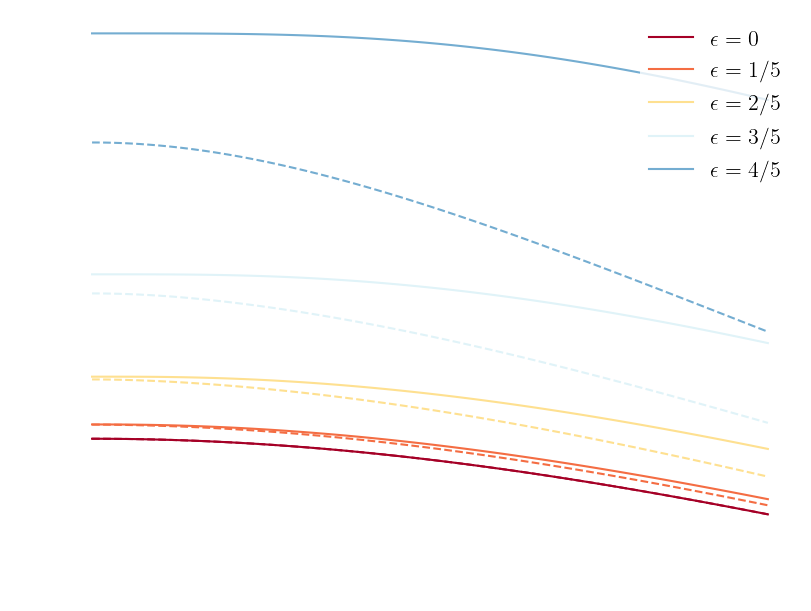

In [22]:
Epsilon = np.linspace(0, 0.8, 5)
Kcs = np.linspace(0, 1, 100)


fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
cmap = plt.get_cmap('RdYlBu')

for epsilon in Epsilon:
    KP = Kp(Kcs, epsilon)
    KM = Km(Kcs, epsilon)
    ax.plot(Kcs, np.sqrt(1 / KM / (KP**2 + 1)), label=fr'$\epsilon={sp.nsimplify(epsilon)}$', color=cmap(epsilon))
    ax.plot(Kcs, np.sqrt(1 / KP / (KM**2 + 1)), ls='--', color=cmap(epsilon))
ax.set_xlabel(r'$k_c=\omega_c/\omega_x$', fontsize=20, color='white')

ax.legend()